# Dataset exploration

## General description

In [150]:
import numpy as np
import pandas as pd
df = pd.read_excel('CCPP/Folds5x2_pp.xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [11]:
df.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [12]:
df.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

## Individual variables

### Ambiant Temperature

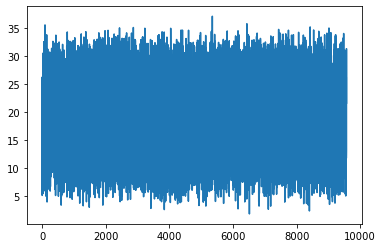

In [16]:
import matplotlib.pyplot as plt
plt.plot(df.AT)

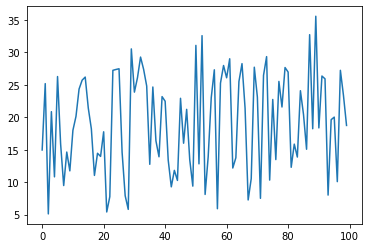

In [17]:
import matplotlib.pyplot as plt
plt.plot(df.AT[0:100])

(array([ 120.,  703., 1173., 1391., 1078., 1353., 1721., 1311.,  652.,
          66.]),
 array([ 1.81,  5.34,  8.87, 12.4 , 15.93, 19.46, 22.99, 26.52, 30.05,
        33.58, 37.11]),
 <BarContainer object of 10 artists>)

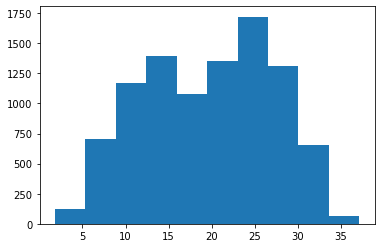

In [18]:
plt.hist(df.AT)

### Exhaust Vacuum 

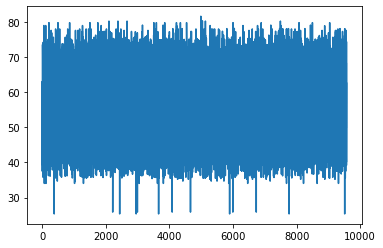

In [19]:
plt.plot(df.V)

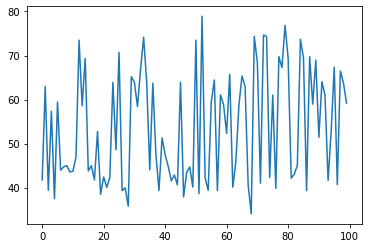

In [20]:
plt.plot(df.V[0:100])

(array([  13.,  154., 2444., 1491.,  825.,  690., 1159., 1463., 1160.,
         169.]),
 array([25.36, 30.98, 36.6 , 42.22, 47.84, 53.46, 59.08, 64.7 , 70.32,
        75.94, 81.56]),
 <BarContainer object of 10 artists>)

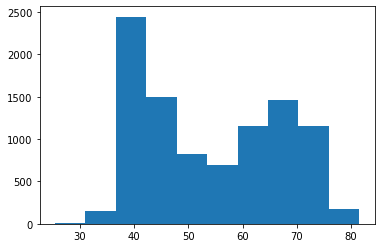

In [21]:
plt.hist(df.V)

### Ambiantal Pressure

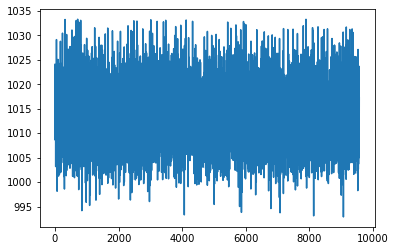

In [22]:
plt.plot(df.AP)

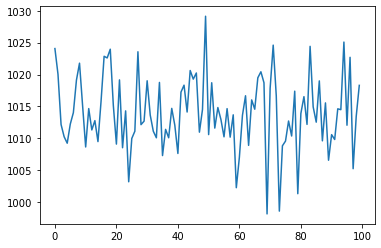

In [23]:
plt.plot(df.AP[0:100])

(array([  16.,  101.,  554., 1699., 2530., 2212., 1586.,  579.,  212.,
          79.]),
 array([ 992.89 ,  996.931, 1000.972, 1005.013, 1009.054, 1013.095,
        1017.136, 1021.177, 1025.218, 1029.259, 1033.3  ]),
 <BarContainer object of 10 artists>)

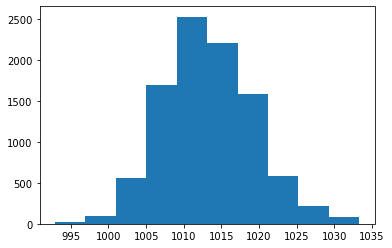

In [24]:
plt.hist(df.AP)

### Relative Humidity

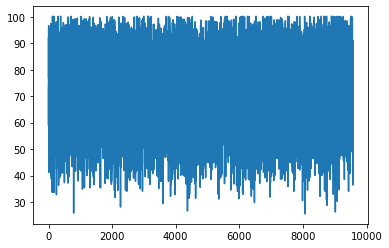

In [25]:
plt.plot(df.RH)

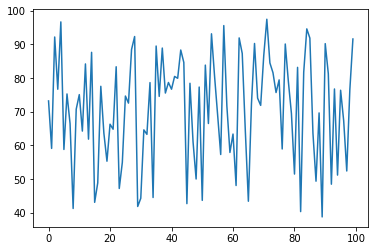

In [26]:
plt.plot(df.RH[0:100])

(array([  27.,  143.,  396.,  689., 1051., 1452., 1714., 1818., 1582.,
         696.]),
 array([ 25.56,  33.02,  40.48,  47.94,  55.4 ,  62.86,  70.32,  77.78,
         85.24,  92.7 , 100.16]),
 <BarContainer object of 10 artists>)

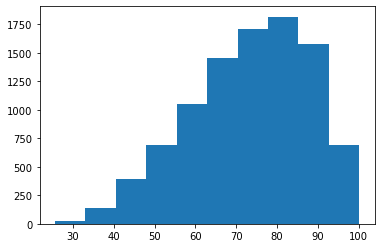

In [27]:
plt.hist(df.RH)

### Electrical Energy Output

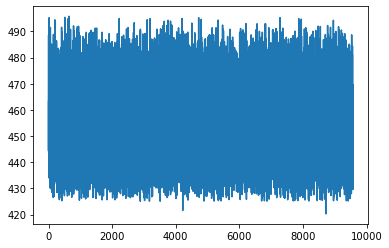

In [28]:
plt.plot(df.PE)

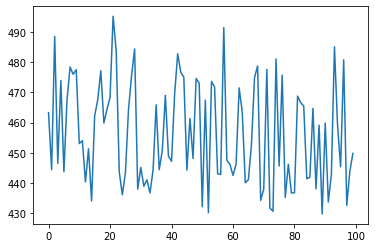

In [29]:
plt.plot(df.PE[0:100])

(array([ 152., 1206., 1812., 1456., 1010., 1061., 1150.,  967.,  595.,
         159.]),
 array([420.26, 427.81, 435.36, 442.91, 450.46, 458.01, 465.56, 473.11,
        480.66, 488.21, 495.76]),
 <BarContainer object of 10 artists>)

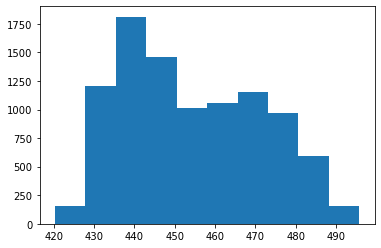

In [30]:
plt.hist(df.PE)

## Correlations

In [32]:
import seaborn as sns

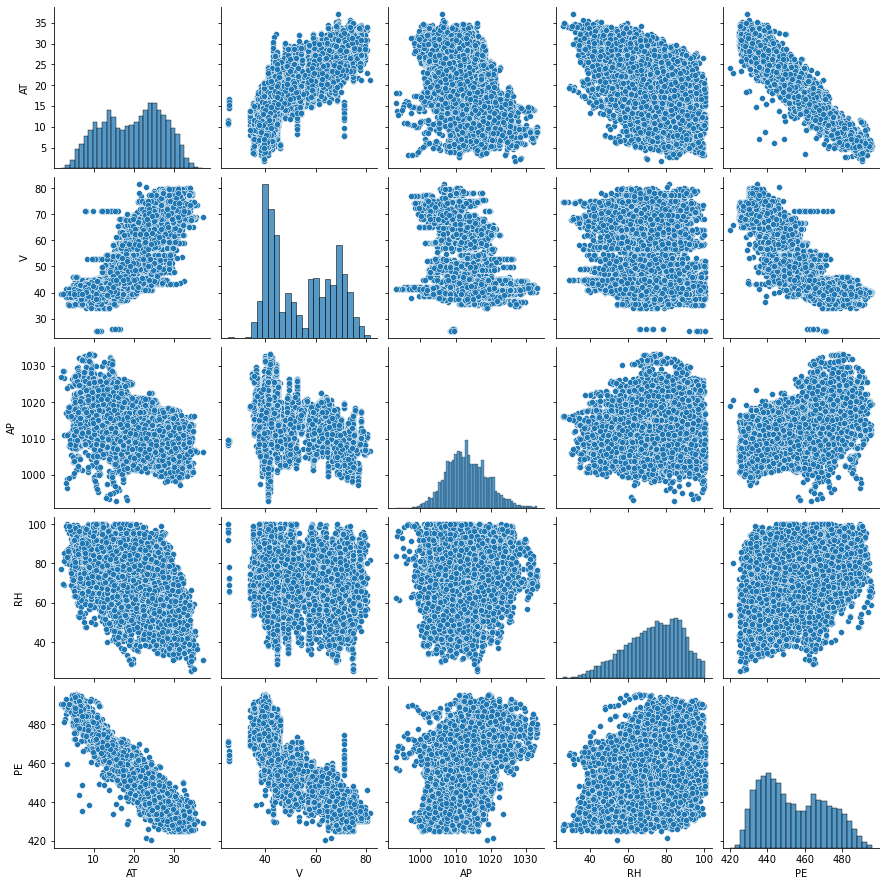

In [33]:
sns.pairplot(df)

Notice some clear correlations as well as some suspicious data --> look into the raw data file / collection process !

# Prediction of Electricity Production 

## Split and Normalize Data

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
X_train

AT      V       AP     RH
7259  29.95  73.42  1011.44  66.32
7944   5.76  40.07  1013.22  62.99
7171  29.44  64.33  1011.40  61.78
6599  32.83  74.33  1011.44  50.42
198   16.86  39.63  1004.47  83.50
...     ...    ...      ...    ...
5734  23.39  61.87  1010.35  48.91
5191  11.63  40.55  1022.89  87.12
5390  27.79  69.23  1012.86  45.71
860   12.26  41.50  1014.87  89.41
7270  11.75  40.55  1018.09  97.70

[6410 rows x 4 columns]

In [106]:
X_test

AT      V       AP     RH
2513  19.64  48.06  1014.81  74.96
9411  28.26  69.23  1013.01  42.10
8745  27.98  67.17  1007.32  75.29
9085  28.64  69.23  1013.11  37.13
4950   9.34  38.08  1019.56  67.74
...     ...    ...      ...    ...
3520  22.12  57.19  1007.56  76.50
1174   9.59  38.56  1017.01  60.10
4264  31.38  71.32  1009.17  60.42
5307  12.38  45.51  1016.15  81.37
1831  22.35  65.61  1016.27  73.93

[3158 rows x 4 columns]

In [107]:
y_train

7259    432.81
7944    494.67
7171    442.32
6599    427.36
198     466.68
         ...  
5734    444.03
5191    474.67
5390    435.06
860     471.13
7270    472.43
Name: PE, Length: 6410, dtype: float64

In [108]:
y_test

2513    455.27
9411    436.31
8745    440.68
9085    434.40
4950    482.06
         ...  
3520    442.51
1174    481.30
4264    433.44
5307    470.46
1831    448.41
Name: PE, Length: 3158, dtype: float64

In [109]:
from sklearn import preprocessing

In [110]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [111]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
X_train

array([[ 1.38538751e+00,  1.50749885e+00, -3.01404146e-01,
        -4.77307458e-01],
       [-1.86892544e+00, -1.12178438e+00, -1.34175735e-03,
        -7.04232885e-01],
       [ 1.31677653e+00,  7.90851634e-01, -3.08147121e-01,
        -7.86689271e-01],
       ...,
       [ 1.09479983e+00,  1.17716311e+00, -6.20285326e-02,
        -1.88179186e+00],
       [-9.94471776e-01, -1.00904450e+00,  2.76805962e-01,
         1.09617846e+00],
       [-1.06308276e+00, -1.08394162e+00,  8.19615452e-01,
         1.66110692e+00]])

## Train Models

In [113]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [114]:
LR.fit(X_train, y_train)

LinearRegression()

In [115]:
LR.score(X_train, y_train)

0.929403558456224

In [116]:
LR.score(X_test, y_test)

0.9271761736761966

In [123]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0)

In [124]:
MLP.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=0,
             tol=0.01)

In [125]:
MLP.score(X_train, y_train)

0.9384898017621403

In [126]:
MLP.score(X_test, y_test)

0.9356405033002054

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
GBR = GradientBoostingRegressor(**params)

In [172]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [173]:
GBR.score(X_train, y_train)

0.9542868256217851

In [174]:
GBR.score(X_test, y_test)

0.947526630584734

## Plot results

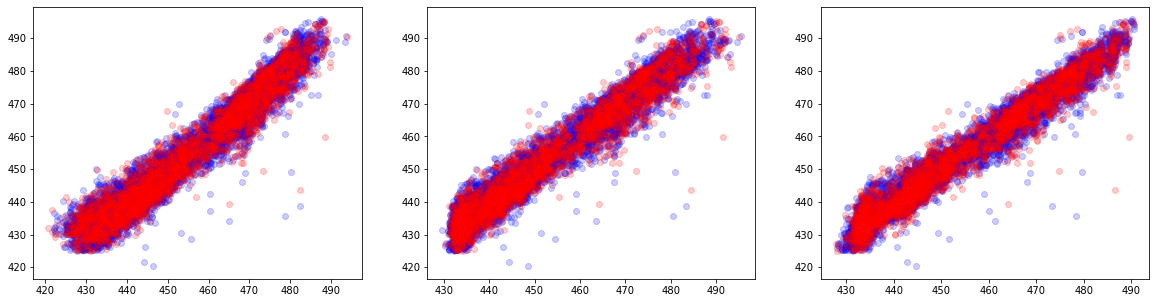

In [146]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
for i, model in enumerate([LR, MLP, GBR]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #axs[i].plot(y_train_pred, y_train, 'bo')
    axs[i].plot(y_train_pred, y_train, color='blue', linestyle='None', marker='o',  alpha=.2)
    axs[i].plot(y_test_pred, y_test, color='red', linestyle='None', marker='o',  alpha=.2)
    



## Interpret results

In [121]:
from sklearn.inspection import permutation_importance

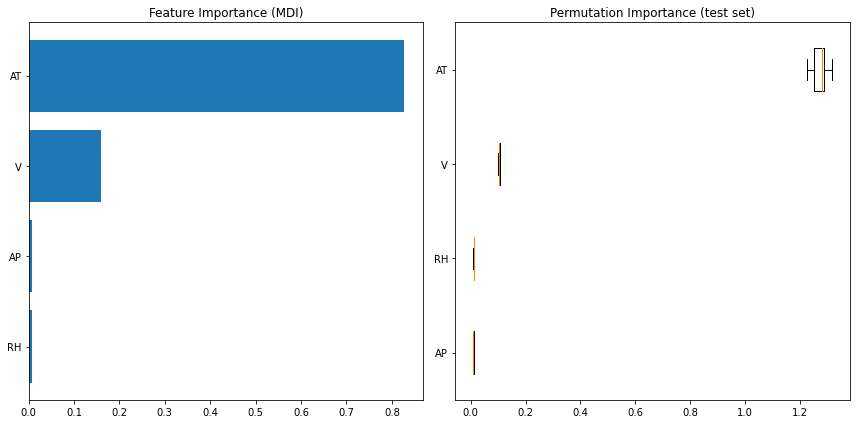

In [155]:
feature_importance = GBR.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    GBR, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## Learning Curve

In [162]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000]
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = X,
    y = y,
    train_sizes = train_sizes,
    cv = 5,
    scoring = 'neg_mean_squared_error')


In [163]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0.0, 40.0)

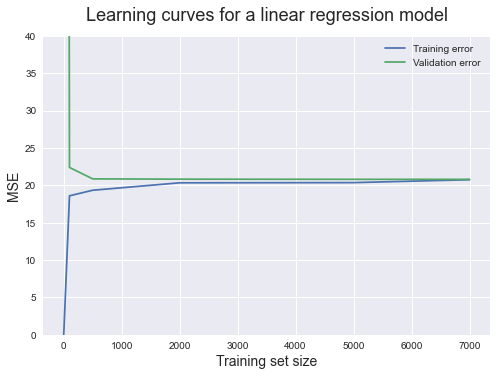

In [164]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [176]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000]
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = GradientBoostingRegressor(**params),
    X = X,
    y = y,
    train_sizes = train_sizes,
    cv = 5,
    scoring = 'neg_mean_squared_error')

In [177]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0.0, 40.0)

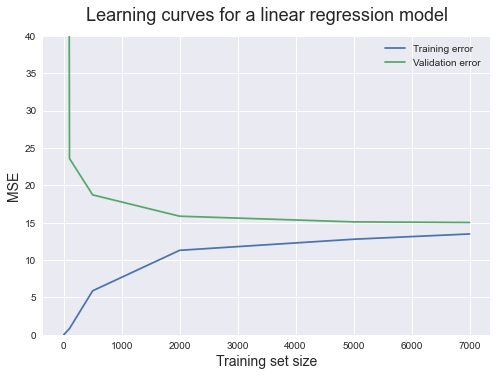

In [178]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)